# Stationary Phase Method 

Statinary phase method is used to evaluate the asymptotic behavior of integration in the following form.

$$
I(x)=\int_a^b f(t)e^{ix\psi(t)}dt, x>>1
$$

The stationary condition reads
$$
\psi'(t)=0.
$$

In case the above condition cannot be fulfilled, then through integration by parts
$$
I(x)=\frac{1}{ix}\frac{f(t)}{\psi'(t)}e^{ix\psi(t)}\bigg|_a^b-\frac{1}{ix}\int_a^b\frac{d}{dt}\left(\frac{f(t)}{\psi'(t)}\right)e^{ix\psi(t)}dt
$$

The integration part vanishes more rapidly than $1/x$ according to **Rimann-Lebesgue lemma** (to be discussed in other notes). 

## Example 1. Vibrational Integration

$$
I(x)=\int_{-3}^{4}\cos(x\sinh^2(t))\sqrt{1+t^2}dt
$$

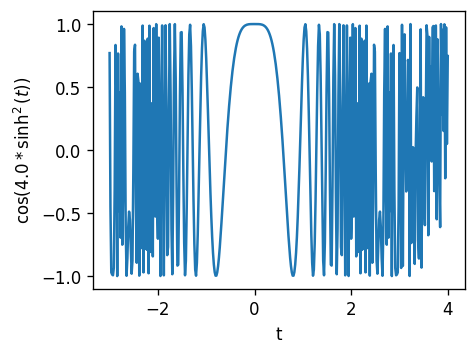

In [24]:
import numpy as np
import matplotlib.pyplot as plt


x = 4


def integrand(t: np.ndarray):
    return np.cos(x * np.sinh(t)**2)


ts = np.linspace(-3, 4, 400)
ys = integrand(ts)
plt.figure(figsize=(4, 3), dpi=120)
plt.plot(ts, ys)
plt.xlabel('t')
plt.ylabel('$\\cos('+f'{x:.1f}'+'* \\sinh^2(t))$')
plt.show()

$$
I(x)\sim\text{Re}\int_{-\infty}^{\infty}e^{ix t^2}dt=\sqrt{\frac{\pi}{2x}}
$$

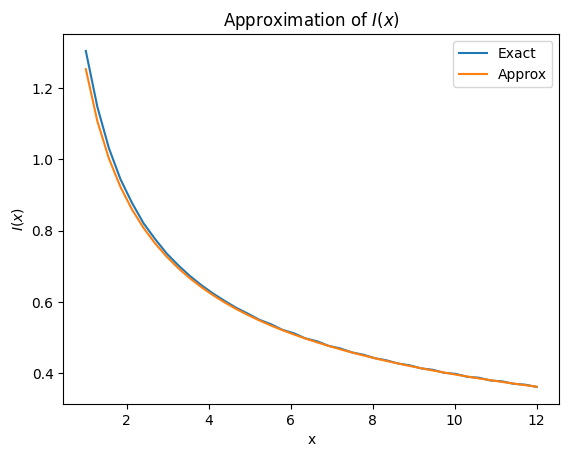

In [7]:
import numpy as np
from numpy import cos, pi, sinh
from scipy.integrate import quad

import matplotlib.pyplot as plt


def exact_int_expr(x):
    def integrand(t):
        return cos(x * sinh(t) ** 2) * (1 + t**2)**(1/2)
    return quad(integrand, -3, 4, limit=1000)


def approx_expr(x):
    return (pi/(2*x))**(1/2)


xs = np.linspace(1, 12, 40)
ys_exact = np.array([exact_int_expr(x)[0] for x in xs])
ys_approx = approx_expr(xs)

plt.plot(xs, ys_exact, label='Exact')
plt.plot(xs, ys_approx, label='Approx')
plt.title('Approximation of $I(x)$')
plt.xlabel('x')
plt.ylabel('$I(x)$')
plt.legend()
plt.show()

**Note**: For large x the integrand vibrates fircely so that ``limit``(the upper bound on the number of subintervals used in the adaptive algorithm) in ``quad`` has to be raised.

## Example 2. Asymptotic behavior of 0-th Bessel function

$$
J_0(x)=\frac{1}{\pi}\int_{-\pi/2}^{\pi/2}\cos(x\cos\theta)d\theta
$$

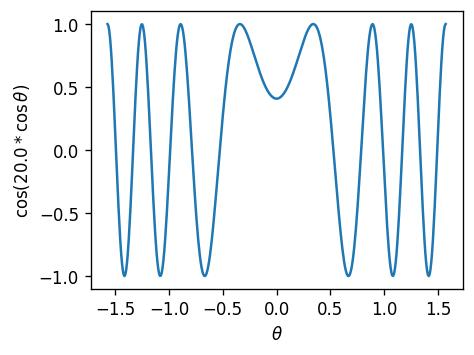

In [17]:
import numpy as np
import matplotlib.pyplot as plt


x = 20


def integrand(t: np.ndarray):
    return np.cos(x * np.cos(t))


ts = np.linspace(-np.pi/2, np.pi/2, 400)
ys = integrand(ts)
plt.figure(figsize=(4, 3), dpi=120)
plt.plot(ts, ys)
plt.xlabel('$\\theta$')
plt.ylabel('$\\cos('+f'{x:.1f}'+'* \\cos \\theta)$')
plt.show()

$$x(y''+y)+y'=0$$

$$
J_0(x)\sim\frac{1}{\pi}\text{Re}\{e^{ix}\int_{-\infty}^{\infty}e^{ix \frac{\theta^2}{2}}d\theta\}=\sqrt{\frac{2}{\pi x}}\cos(x-\frac{\pi}{4})
$$

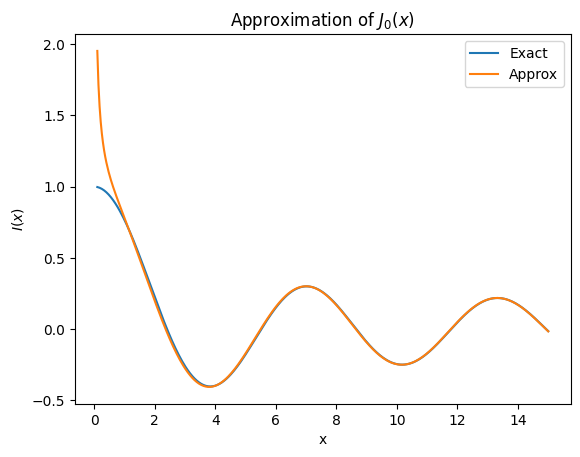

In [18]:
import numpy as np
from numpy import cos, pi
from scipy.special import j0
import matplotlib.pyplot as plt


def approx_expr(x):
    return (2/(pi*x))**(1/2) * cos(x - pi/4)


xs = np.linspace(0.1, 15, 400)
ys_exact = j0(xs)
ys_approx = approx_expr(xs)

plt.plot(xs, ys_exact, label='Exact')
plt.plot(xs, ys_approx, label='Approx')
plt.title('Approximation of $J_0(x)$')
plt.xlabel('x')
plt.ylabel('$I(x)$')
plt.legend()
plt.show()

## Example 3. Decayed vibration 

$$I(x)=\int_0^1\frac{\cos(xt)}{1+t}dt=\text{Re}\int_0^1\frac{e^{ixt}}{1+t}dt$$

Do the integration by part to the 2nd-order of 1/x
$$
\int_0^1\frac{e^{ixt}}{1+t}dt=\frac{1}{ix}(\frac{e^{ixt}}{2}-1)-\frac{1}{x^2}(\frac{e^{ixt}}{4}-1)-\frac{2}{x^2}\int_0^1(\frac{e^{ixt}}{(1+t)^3}dt
$$

$$I(x)\sim\frac{\sin x}{2x}-\frac{1}{x^2}\left(\frac{\cos x}{4}-1\right)$$

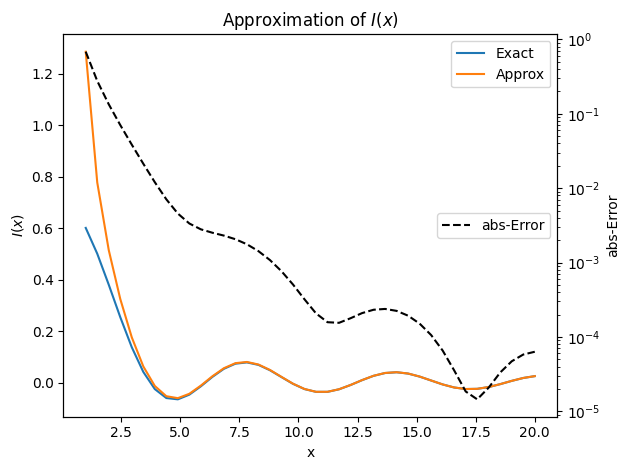

In [23]:
import numpy as np
from numpy import cos, pi, sinh
from scipy.integrate import quad

import matplotlib.pyplot as plt


def exact_int_expr(x):
    def integrand(t):
        return cos(x * t) / (1 + t)
    return quad(integrand, 0, 1)


def approx_expr(x):
    # I(x)\sim\frac{\sin x}{2x}-\frac{1}{x^2}\left(\frac{\cos x}{4}-1\right)
    return np.sin(x)/(2*x) - (1/x**2)*(cos(x)/4 - 1)


xs = np.linspace(1, 20, 40)
ys_exact = np.array([exact_int_expr(x)[0] for x in xs])
ys_approx = approx_expr(xs)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(xs, ys_exact, label='Exact')
ax.plot(xs, ys_approx, label='Approx')
ax.set_title('Approximation of $I(x)$')
ax.set_xlabel('x')
ax.set_ylabel('$I(x)$')
ax.legend()

ax2 = ax.twinx()
ax2.plot(xs, np.abs(ys_exact - ys_approx), 'k--', label='abs-Error')
ax2.set_ylabel('abs-Error')
ax2.set_yscale('log')
ax2.legend(loc='center right')

plt.tight_layout()
plt.show()